# Import data

In [ ]:
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.3 MB/s eta 0:00:00


In [ ]:
!pip install -q roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="No0u4cAfLEDcMVCrh2vh")
project = rf.workspace("egyptian-ids").project("egyptian-id")
dataset = project.version(2).download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 126.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to egyptian-id-2 in yolov8:: 100%|██████████| 576/576 [00:00<00:00, 7874.21it/s]


In [ ]:
data_yaml = f"{dataset.location}/data.yaml"
data_yaml

'/content/egyptian-id-2/data.yaml'

# Model Training

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")

results = model.train(
    data=data_yaml,
    epochs=50,
    batch=8,
    device=0,
    workers=2,
    cache=True
)


Ultralytics 8.3.184 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/egyptian-id-2/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=

Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

Model summary: 129 layers, 11,138,309 parameters, 11,138,293 gradients, 28.7 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1800.4±530.5 MB/s, size: 68.9 KB)


train: Scanning /content/egyptian-id-2/train/labels... 266 images, 0 backgrounds, 0 corrupt: 100%|██████████| 266/266 [00:00<00:00, 1663.75it/s]

train: New cache created: /content/egyptian-id-2/train/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.3GB RAM): 100%|██████████| 266/266 [00:00<00:00, 367.92it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 720.2±409.7 MB/s, size: 38.6 KB)


val: Scanning /content/egyptian-id-2/valid/labels... 11 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11/11 [00:00<00:00, 721.14it/s]

val: New cache created: /content/egyptian-id-2/valid/labels.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.0GB RAM): 100%|██████████| 11/11 [00:00<00:00, 152.72it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.04G       1.49      2.675      1.546         27        640: 100%|██████████| 34/34 [00:08<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.41s/it]

                   all         11         74      0.629      0.799      0.809      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.19G      1.057       1.11      1.216         19        640: 100%|██████████| 34/34 [00:06<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]

                   all         11         74      0.828      0.928      0.948      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.22G      1.031     0.9289      1.188         26        640: 100%|██████████| 34/34 [00:06<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         11         74      0.798      0.885      0.896      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.26G     0.9913     0.8107      1.153         38        640: 100%|██████████| 34/34 [00:06<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]

                   all         11         74      0.898      0.927       0.94      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.29G     0.9295     0.7457      1.144         26        640: 100%|██████████| 34/34 [00:07<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]

                   all         11         74      0.919      0.949      0.974       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.33G     0.9152     0.6873      1.117         25        640: 100%|██████████| 34/34 [00:05<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]

                   all         11         74      0.874      0.953      0.939      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.37G     0.9007     0.6821      1.115         24        640: 100%|██████████| 34/34 [00:06<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]

                   all         11         74      0.924      0.953      0.954      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       2.4G     0.8635     0.6194      1.099         31        640: 100%|██████████| 34/34 [00:06<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.70it/s]

                   all         11         74      0.913      0.914      0.972      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.44G     0.8381      0.604      1.083         30        640: 100%|██████████| 34/34 [00:06<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]

                   all         11         74      0.942      0.957      0.972       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.47G      0.837     0.5924      1.087         31        640: 100%|██████████| 34/34 [00:07<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all         11         74      0.912      0.981      0.971      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.62G     0.8253     0.5734      1.082         20        640: 100%|██████████| 34/34 [00:06<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]

                   all         11         74      0.893      0.977      0.954      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.66G     0.7945     0.5548      1.079         34        640: 100%|██████████| 34/34 [00:07<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         11         74      0.926      0.963      0.954      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       2.7G      0.771     0.5176       1.05         16        640: 100%|██████████| 34/34 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all         11         74       0.92      0.959      0.955      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.76G     0.7588     0.5126      1.041         19        640: 100%|██████████| 34/34 [00:06<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.61it/s]

                   all         11         74       0.94      0.944      0.962      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.79G     0.7462     0.5126      1.044         23        640: 100%|██████████| 34/34 [00:06<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.19it/s]

                   all         11         74      0.935      0.984      0.963      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.86G     0.7127      0.494      1.033         12        640: 100%|██████████| 34/34 [00:06<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.57it/s]

                   all         11         74      0.938      0.979      0.968      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.93G     0.7066     0.4801      1.028         34        640: 100%|██████████| 34/34 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.60it/s]

                   all         11         74      0.948      0.968      0.969      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.02G     0.6846     0.4655      1.009         33        640: 100%|██████████| 34/34 [00:06<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all         11         74      0.912      0.978      0.968      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.08G     0.6618     0.4486     0.9993         31        640: 100%|██████████| 34/34 [00:05<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.71it/s]

                   all         11         74      0.921      0.961       0.94      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.15G     0.6779      0.466      1.015         13        640: 100%|██████████| 34/34 [00:07<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]

                   all         11         74      0.923      0.964      0.941      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.22G     0.6547     0.4405     0.9937         18        640: 100%|██████████| 34/34 [00:06<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all         11         74      0.938      0.954      0.958      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.28G     0.6282     0.4262     0.9951         26        640: 100%|██████████| 34/34 [00:06<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.59it/s]

                   all         11         74      0.923      0.988      0.962      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.31G     0.6248     0.4266     0.9958         23        640: 100%|██████████| 34/34 [00:06<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         11         74      0.938      0.978      0.978      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       3.4G     0.6239     0.4292     0.9961         15        640: 100%|██████████| 34/34 [00:06<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]

                   all         11         74      0.942      0.979      0.968      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.46G      0.611     0.4161     0.9832         27        640: 100%|██████████| 34/34 [00:07<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.32it/s]

                   all         11         74       0.93      0.986      0.969      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.51G     0.5869     0.3997     0.9739         33        640: 100%|██████████| 34/34 [00:06<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.86it/s]

                   all         11         74      0.946      0.979      0.966      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.66G     0.5923     0.4016     0.9773         21        640: 100%|██████████| 34/34 [00:07<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all         11         74      0.947      0.979       0.97      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       3.7G     0.5833     0.3974     0.9651         23        640: 100%|██████████| 34/34 [00:06<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.39it/s]

                   all         11         74      0.943      0.971       0.97      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.73G     0.5632     0.3804     0.9638         28        640: 100%|██████████| 34/34 [00:07<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]

                   all         11         74      0.915      0.988      0.969      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.77G      0.583     0.3926     0.9758         26        640: 100%|██████████| 34/34 [00:06<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all         11         74      0.925      0.981      0.971      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.85G     0.5699      0.389     0.9698         23        640: 100%|██████████| 34/34 [00:07<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.14it/s]

                   all         11         74       0.94      0.981      0.967      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.91G     0.5389     0.3628     0.9586         32        640: 100%|██████████| 34/34 [00:06<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all         11         74      0.936       0.98      0.967      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.98G     0.5292     0.3611     0.9529         20        640: 100%|██████████| 34/34 [00:06<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.56it/s]


                   all         11         74      0.939       0.98      0.968      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.06G     0.5264     0.3567     0.9481         30        640: 100%|██████████| 34/34 [00:07<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]

                   all         11         74      0.932      0.963      0.966      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.12G     0.5073     0.3437     0.9368         36        640: 100%|██████████| 34/34 [00:06<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]


                   all         11         74      0.945      0.977       0.97      0.676

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.19G      0.519     0.3511     0.9452         21        640: 100%|██████████| 34/34 [00:07<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.71it/s]

                   all         11         74      0.947      0.987      0.969      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.25G     0.5022     0.3461     0.9444         18        640: 100%|██████████| 34/34 [00:06<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all         11         74      0.948      0.988       0.98      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.32G     0.4982     0.3418     0.9409         18        640: 100%|██████████| 34/34 [00:07<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.70it/s]

                   all         11         74      0.943      0.988      0.976      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.38G     0.4829     0.3235     0.9305         23        640: 100%|██████████| 34/34 [00:06<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.86it/s]

                   all         11         74      0.937      0.986      0.976      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.44G     0.4859     0.3278     0.9329         45        640: 100%|██████████| 34/34 [00:06<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.39it/s]

                   all         11         74      0.937      0.984      0.973      0.665


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.51G     0.4249     0.3151     0.8994         14        640: 100%|██████████| 34/34 [00:06<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]

                   all         11         74      0.934       0.98      0.969      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.54G     0.3961      0.282     0.8906         13        640: 100%|██████████| 34/34 [00:05<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.45it/s]

                   all         11         74      0.939      0.979       0.97      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       4.6G     0.3905     0.2757     0.8889         13        640: 100%|██████████| 34/34 [00:05<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.68it/s]

                   all         11         74       0.94      0.979      0.974      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.75G     0.3941     0.2779     0.8894         14        640: 100%|██████████| 34/34 [00:05<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.50it/s]

                   all         11         74      0.938      0.976      0.967      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.78G     0.3771     0.2602     0.8791         14        640: 100%|██████████| 34/34 [00:05<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.36it/s]

                   all         11         74      0.933      0.964      0.966      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.82G     0.3648     0.2593     0.8812         12        640: 100%|██████████| 34/34 [00:06<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.13it/s]

                   all         11         74       0.94      0.978      0.963      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.86G     0.3479     0.2489     0.8728         14        640: 100%|██████████| 34/34 [00:05<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.41it/s]

                   all         11         74      0.941      0.978      0.963       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.93G     0.3519     0.2498     0.8788         12        640: 100%|██████████| 34/34 [00:06<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.94it/s]

                   all         11         74      0.938      0.979      0.965      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         5G     0.3444     0.2454     0.8757         12        640: 100%|██████████| 34/34 [00:05<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.28it/s]

                   all         11         74       0.94      0.978      0.963      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.05G     0.3343     0.2399     0.8653         12        640: 100%|██████████| 34/34 [00:06<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         11         74       0.94      0.978      0.964       0.67



50 epochs completed in 0.098 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.184 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.20it/s]


                   all         11         74      0.936       0.98      0.967      0.684
           egyptian-id         10         10      0.895          1       0.95      0.938
             firstname         11         12          1      0.859      0.939      0.478
              location         11         11      0.964          1      0.995      0.714
       manfucturing_id          9          9      0.816          1      0.984      0.666
           national_id         10         10      0.892          1      0.913       0.48
                   pic         11         11      0.988          1      0.995      0.815
           second name         11         11      0.998          1      0.995      0.696
Speed: 0.2ms preprocess, 4.0ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train


# Model Testing

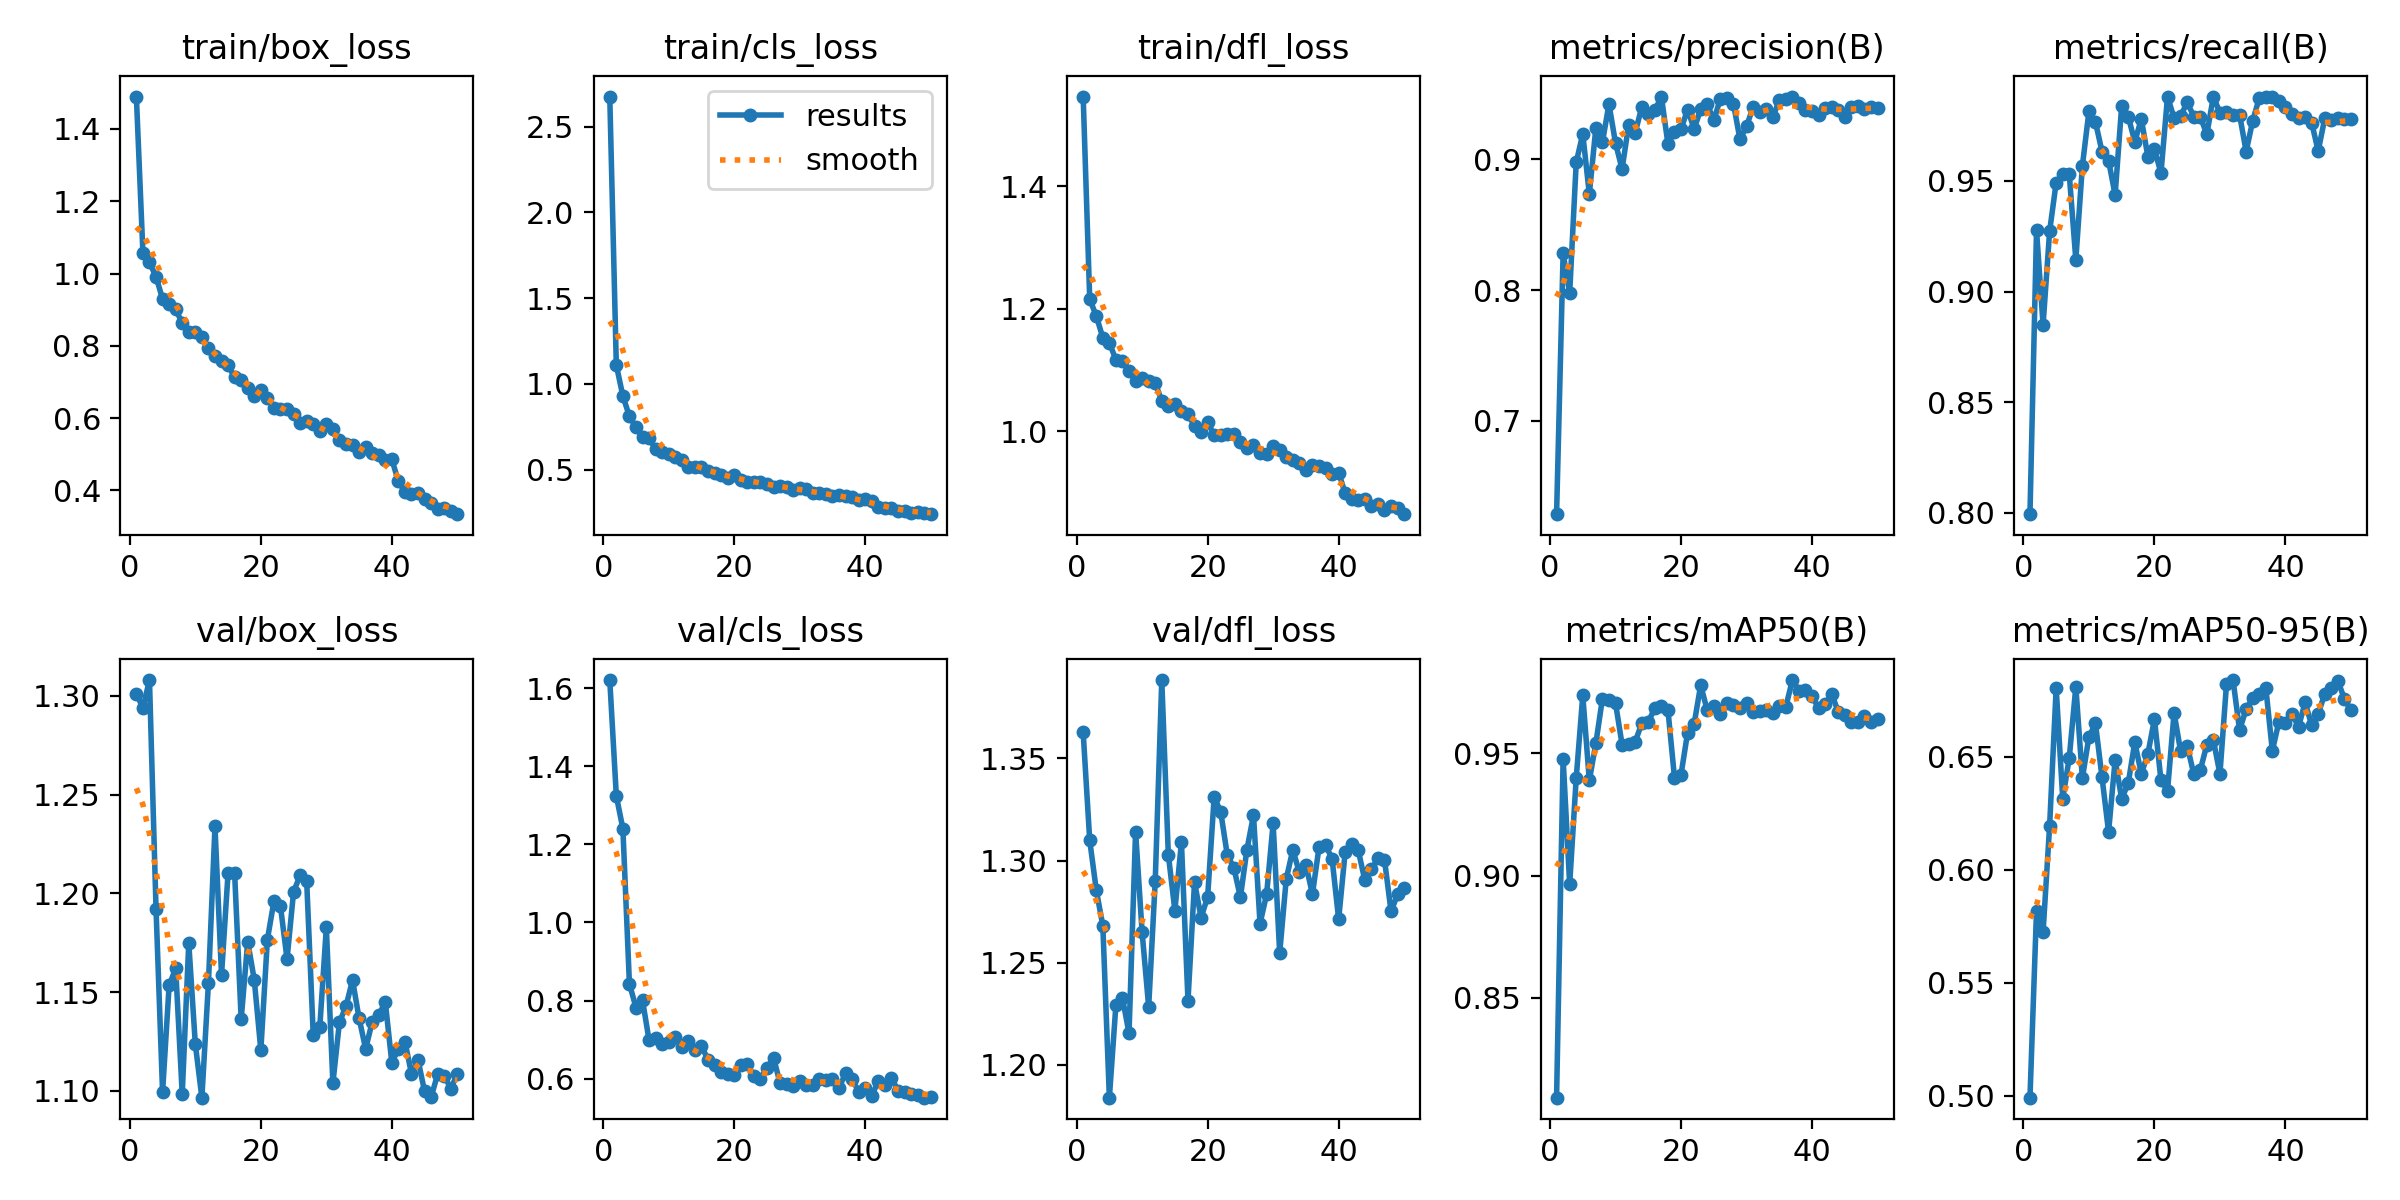

In [ ]:
import glob, os
from IPython.display import Image, display

run_dir = "runs/detect/train/results.png"
display(Image(filename=run_dir))

In [ ]:
from ultralytics import YOLO
det = YOLO("runs/detect/train/weights/best.pt")
det.val(data=data_yaml)


Ultralytics 8.3.184 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 950.3±449.1 MB/s, size: 43.6 KB)


val: Scanning /content/egyptian-id-2/valid/labels.cache... 11 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11/11 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


                   all         11         74      0.936       0.98      0.967      0.685
           egyptian-id         10         10      0.895          1       0.95      0.938
             firstname         11         12          1      0.859      0.939      0.473
              location         11         11      0.964          1      0.995      0.715
       manfucturing_id          9          9      0.816          1      0.984      0.675
           national_id         10         10      0.893          1      0.913      0.478
                   pic         11         11      0.988          1      0.995      0.819
           second name         11         11      0.998          1      0.995      0.696
Speed: 0.2ms preprocess, 23.2ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a53eeb63f50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  


image 1/5 /content/egyptian-id-2/test/images/10_jpg.rf.538869483e5003c8343162081625d23d.jpg: 1024x1024 2 egyptian-ids, 1 firstname, 1 location, 1 manfucturing_id, 1 national_id, 1 pic, 1 second name, 32.9ms
image 2/5 /content/egyptian-id-2/test/images/13_jpg.rf.c400970e064e70eba755e3160fc76ca7.jpg: 1024x1024 2 egyptian-ids, 1 firstname, 1 location, 1 manfucturing_id, 1 national_id, 2 pics, 1 second name, 32.9ms
image 3/5 /content/egyptian-id-2/test/images/36_jpg.rf.47ce02cdea2b0bf666fd82491b43ece5.jpg: 1024x1024 3 egyptian-ids, 1 firstname, 1 location, 1 manfucturing_id, 1 national_id, 1 pic, 1 second name, 32.9ms
image 4/5 /content/egyptian-id-2/test/images/56_jpg.rf.07b3a2e279fc7eae2a2b8a3d75de7e66.jpg: 1024x1024 2 egyptian-ids, 1 firstname, 1 location, 1 manfucturing_id, 1 national_id, 1 pic, 1 second name, 32.9ms
image 5/5 /content/egyptian-id-2/test/images/59_jpg.rf.7414aad81249f2f93a705d4febc12017.jpg: 1024x1024 1 egyptian-id, 1 firstname, 1 location, 1 manfucturing_id, 1 nation

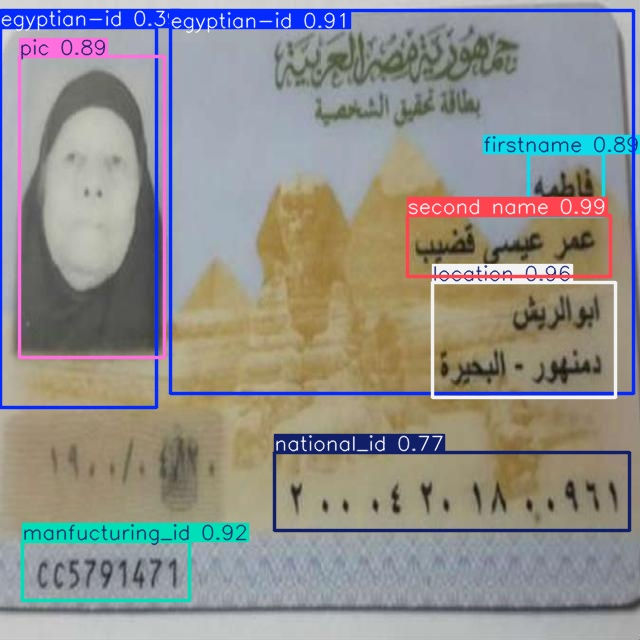

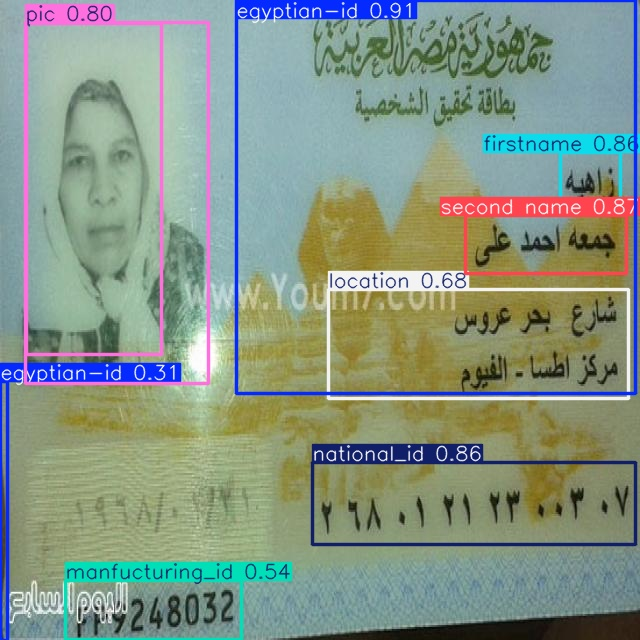

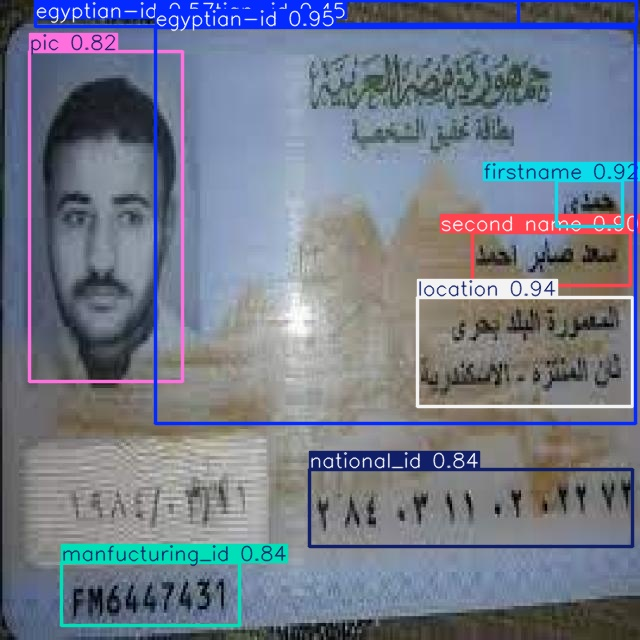

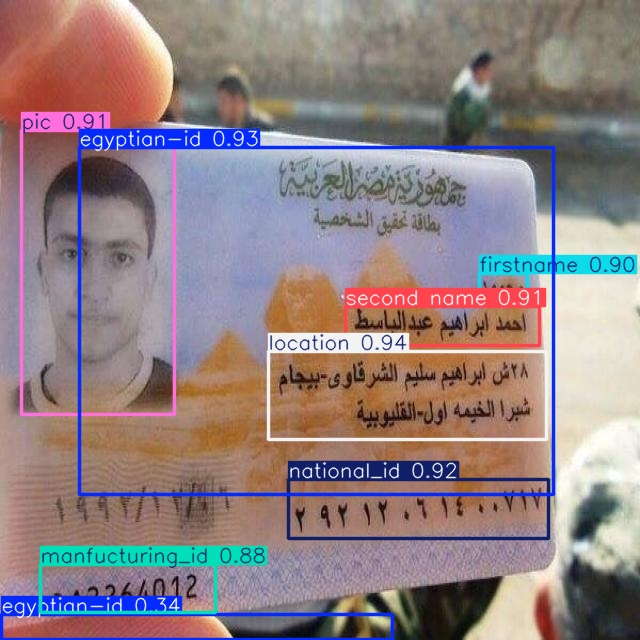

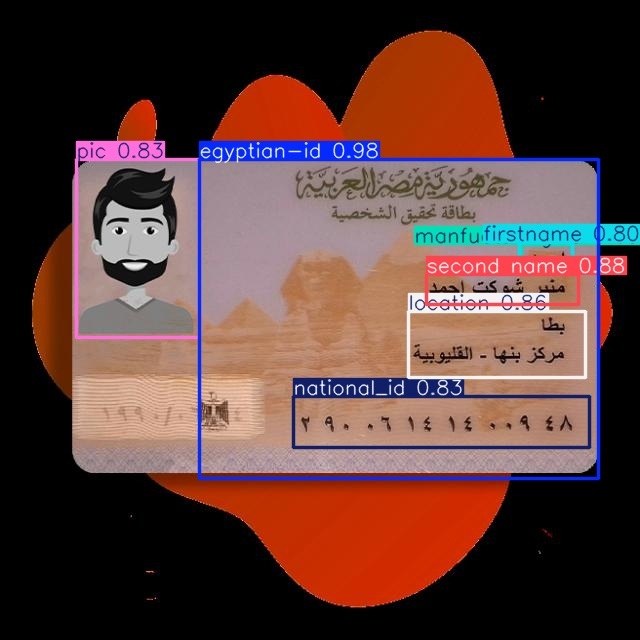

In [ ]:
pred = det.predict(
    source=f"{dataset.location}/test/images",
    imgsz=1024, save=True, device=0
)

import glob
from IPython.display import Image, display

pred_dir = sorted(glob.glob("runs/detect/predict*"))[-1]
for p in sorted(glob.glob(pred_dir + "/*.jpg"))[:8]:
    display(Image(filename=p))
